<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-statement---1" data-toc-modified-id="Problem-statement---1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem statement - 1</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#Support-Vector-Classifier" data-toc-modified-id="Support-Vector-Classifier-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Support Vector Classifier</a></span></li></ul></li><li><span><a href="#Problem-statement---2" data-toc-modified-id="Problem-statement---2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem statement - 2</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#Support-Vector-Classifier" data-toc-modified-id="Support-Vector-Classifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Support Vector Classifier</a></span></li></ul></li></ul></div>

### Problem statement - 1

In [1]:
# Dataset loading
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Model libraries
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Warnings
import warnings
warnings.filterwarnings('ignore')

#### Exploratory Data Analysis

In [2]:
# Dataset
fire = pd.read_csv(r".\forestfires.csv")

# View dataset
fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
#1. Technical inforamtion
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

Observatoin:

Month and day column are encoded. Dataset without encoded columns considered for analysis.

In [4]:
fire_df = fire.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 30]]
fire_df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [5]:
#2. Shape of dataset
fire_df.shape

(517, 12)

In [6]:
#3. Presence of null values
fire_df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [7]:
#4. Presence of duplicate records
fire_df.duplicated().sum()

8

In [8]:
# Dropping duplicate records
fire_df = fire_df.drop_duplicates()
fire_df.shape

(509, 12)

In [9]:
fire = fire.drop_duplicates()
fire.shape

(509, 31)

In [10]:
#5. Statistical information
fire_df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [11]:
# Stats of categorical columns
fire_df.describe(exclude=(int, float))

,month,day,size_category
count,509,509,509
unique,12,7,2
top,aug,sun,small
freq,178,94,371


#### Visualization

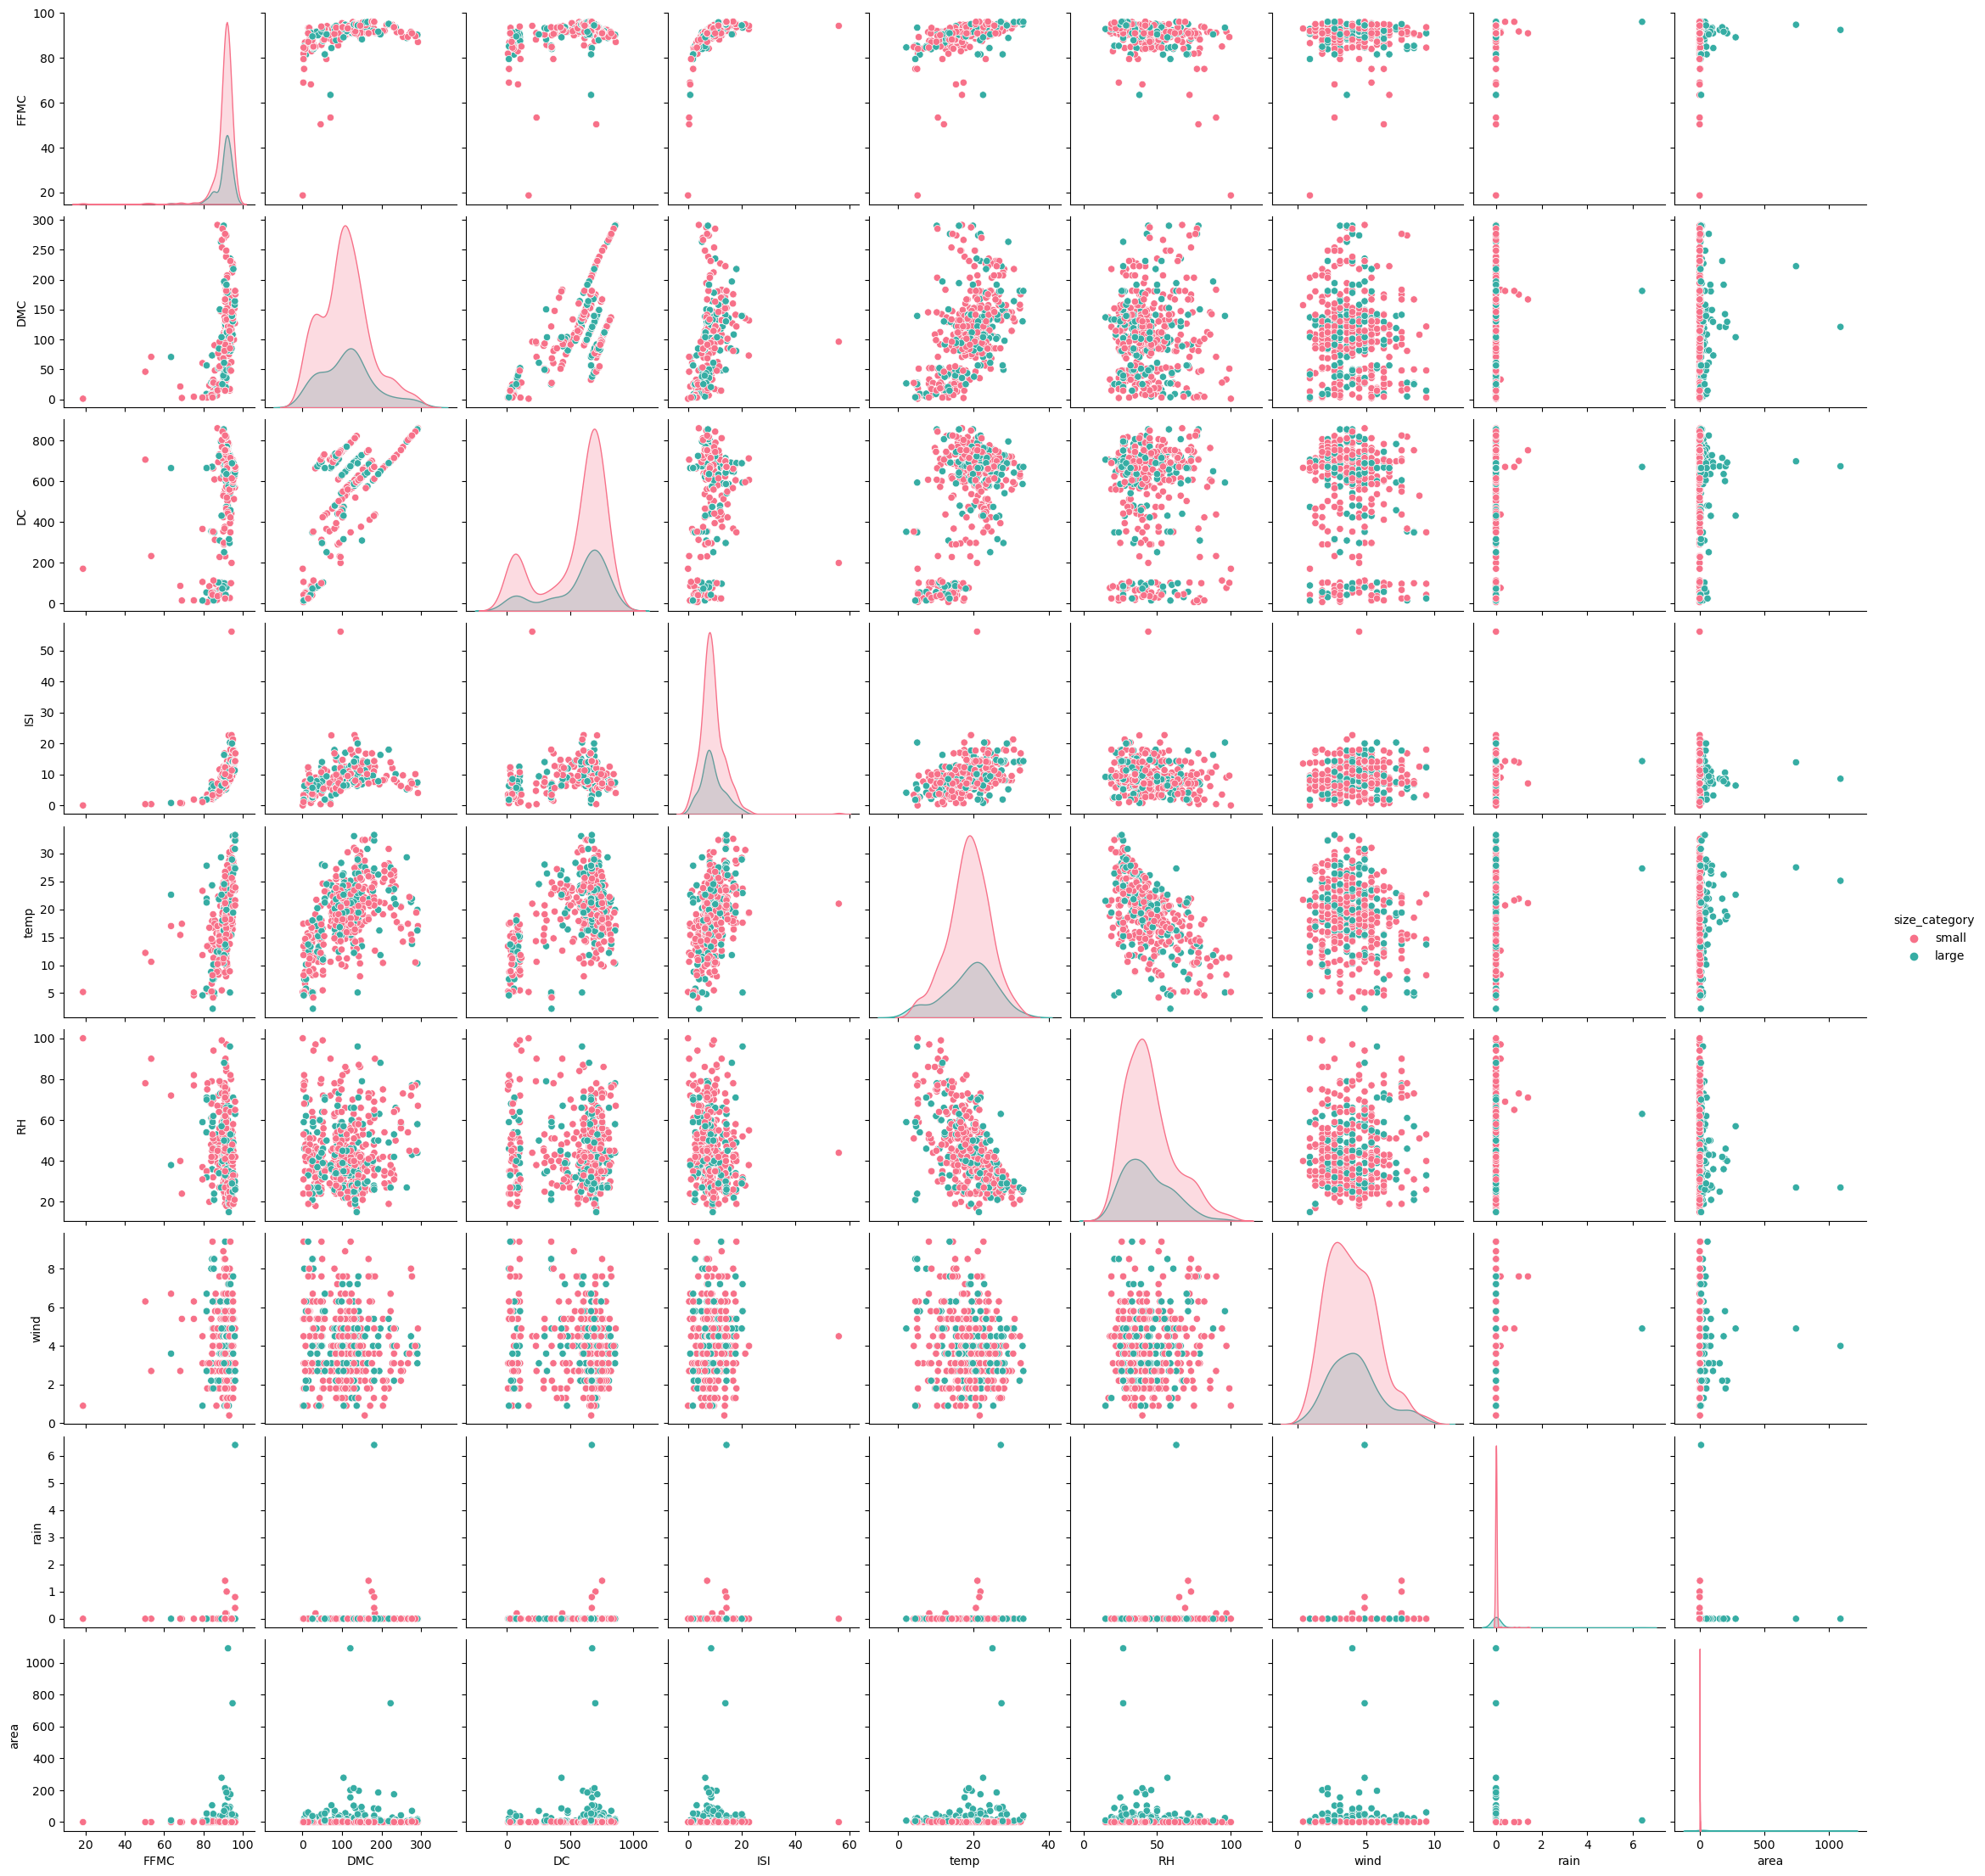

In [12]:
#6. Visualization of dataset - Only numerical data
sns.pairplot(data=fire_df, kind='scatter', diag_kind='kde', hue='size_category', palette='husl')
plt.show()

In [13]:
# Skewness in the dataset
fire_df.skew(numeric_only=True)

FFMC    -6.540474
DMC      0.558596
DC      -1.100245
ISI      2.529891
temp    -0.321869
RH       0.869644
wind     0.581689
rain    20.044822
area    12.753940
dtype: float64

In [14]:
# Kurtosis in the dataset
fire_df.kurtosis(numeric_only=True)

FFMC     66.255682
DMC       0.251618
DC       -0.242656
ISI      21.288771
temp      0.101560
RH        0.447242
wind      0.043986
rain    426.542289
area    191.265722
dtype: float64

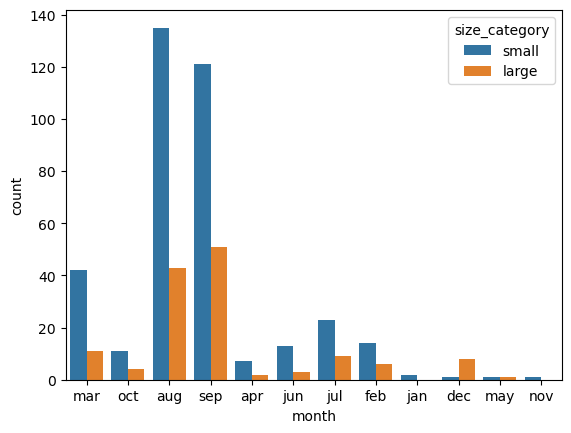

In [15]:
#7. Visualization of non numerical data
# Monthwise
sns.countplot(data=fire_df, x='month', hue='size_category')
plt.show()

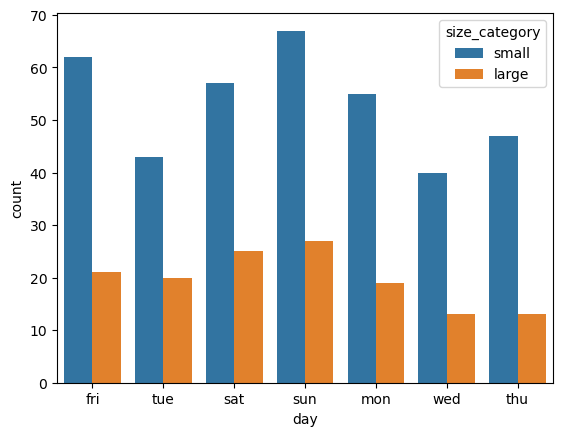

In [16]:
# Daywise
sns.countplot(data=fire_df, x='day', hue='size_category')
plt.show()

In [17]:
#8. Correlation among dataset
fire_df.corr(numeric_only=True)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000


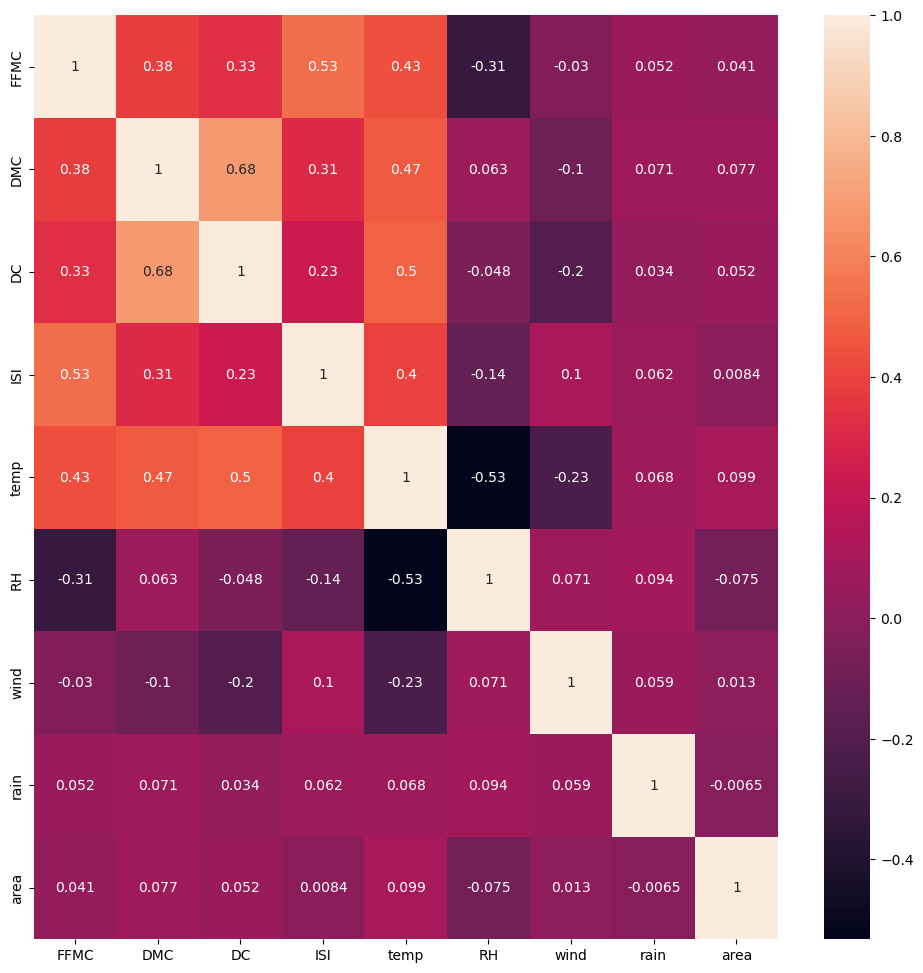

In [18]:
# Heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(data=fire_df.corr(numeric_only=True), annot=True)
plt.show()

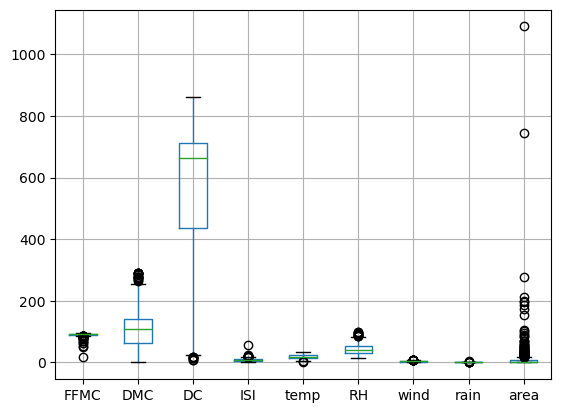

In [19]:
#9. Presence of outliers
fire_df.boxplot()
plt.show()

Observation:
1. Dataset has 517 records and 31 columns. In which, categorical data columns month and day are onehot encoded.
2. Data types are consistent.
3. No null values observed.
4. 8 nos of duplicate records found and removed.
5. From boxplot, outliers can be observed. Dataset needs to be standardized before processing
6. Correlation among dataset is low.

In [20]:
# Selection of columns
fire = fire.drop(['month', 'day'], axis=1)
fire.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [21]:
# Encoding the size_category dataset

encoder = LabelEncoder()
fire['size_category'] = encoder.fit_transform(fire['size_category'])
fire['size_category']

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 509, dtype: int32

In [22]:
fire.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [23]:
# Selection of features
x = fire.drop('size_category', axis=1)
y = fire['size_category']

In [24]:
# Splitting of dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [25]:
# Scaling the data

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Support Vector Classifier

In [26]:
# Fitting Support Vector Machine model and finding best kernel

sn = 1
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    print(f'{sn}. SVC model using kernel - {kernel}')
    classifier = SVC(kernel=kernel, random_state=10)
    classifier.fit(x_train, y_train)
    predicts = classifier.predict(x_test)
    print('Confusion matrix: ')
    cm = confusion_matrix(y_test, predicts)
    print(cm)
    print()
    print('Classification report: ')
    clr = classification_report(y_test, predicts)
    print(clr)
    print()
    sn += 1

1. SVC model using kernel - linear
Confusion matrix: 
[[ 36   1]
 [  2 114]]

Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.99      0.98      0.99       116

    accuracy                           0.98       153
   macro avg       0.97      0.98      0.97       153
weighted avg       0.98      0.98      0.98       153


2. SVC model using kernel - poly
Confusion matrix: 
[[  5  32]
 [  5 111]]

Classification report: 
              precision    recall  f1-score   support

           0       0.50      0.14      0.21        37
           1       0.78      0.96      0.86       116

    accuracy                           0.76       153
   macro avg       0.64      0.55      0.53       153
weighted avg       0.71      0.76      0.70       153


3. SVC model using kernel - rbf
Confusion matrix: 
[[ 11  26]
 [  2 114]]

Classification report: 
              precision    recall  f1-score

Observaton:

From above reports it can be observed that svc model with linear kernel have 98% accuarcy.    

In [27]:
# Fitting best model
svc = SVC(kernel='linear', random_state=10)
svc.fit(x_train, y_train)
y_preds = svc.predict(x_test)

In [28]:
# Evaluation of model
# Confusion matrix
matrix = confusion_matrix(y_test, y_preds)
matrix

array([[ 36,   1],
       [  2, 114]], dtype=int64)

In [29]:
# Classification report
report = classification_report(y_test, y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.99      0.98      0.99       116

    accuracy                           0.98       153
   macro avg       0.97      0.98      0.97       153
weighted avg       0.98      0.98      0.98       153



### Problem statement - 2

#### Exploratory Data Analysis

In [30]:
# Loading dataset
train = pd.read_csv(r".\SalaryData_Train(1).csv")
test = pd.read_csv(r".\SalaryData_Test(1).csv")

In [31]:
# View of train data
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
# View of test data
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [33]:
# Technical info of train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [34]:
# Analysis of education and educationno columns
train['education'].value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [35]:
train['educationno'].value_counts()

9     9840
10    6677
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: educationno, dtype: int64

Observation:

From above it can be observed that education and educationno columns are same but in different Dtype. Only can be utilized for further analysis. Also, capitalgain and captalloss columns doen't required for salary determination. 

In [36]:
train = train.drop(['educationno', 'capitalgain', 'capitalloss'], axis=1)
train.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [37]:
test = test.drop(['educationno', 'capitalgain', 'capitalloss'], axis=1)
test.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


In [38]:
# Unique values in the dataset
train.nunique()

age              72
workclass         7
education        16
maritalstatus     7
occupation       14
relationship      6
race              5
sex               2
hoursperweek     94
native           40
Salary            2
dtype: int64

In [39]:
# presence of null values
train.isnull().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [40]:
test.isnull().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [41]:
# Presence of duplicate records
train.duplicated().sum()

4020

In [42]:
train = train.drop_duplicates()
train.shape

(26141, 11)

In [43]:
test.duplicated().sum()

1165

In [44]:
test = test.drop_duplicates()
test.shape

(13895, 11)

#### Visualization

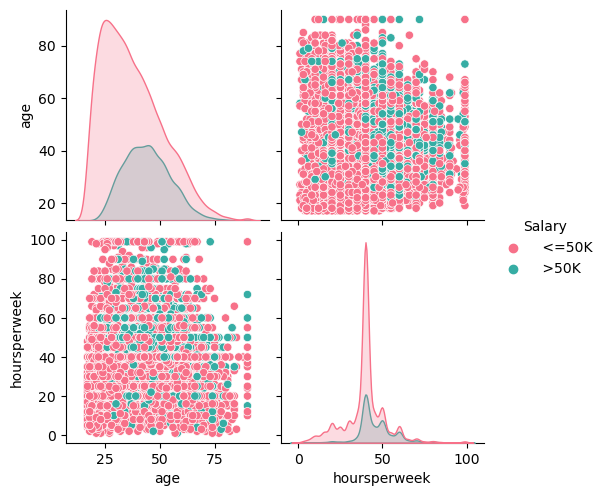

In [45]:
# Visualization of train dataset
sns.pairplot(data=train, kind='scatter', diag_kind='kde', hue='Salary', palette='husl')
plt.show()

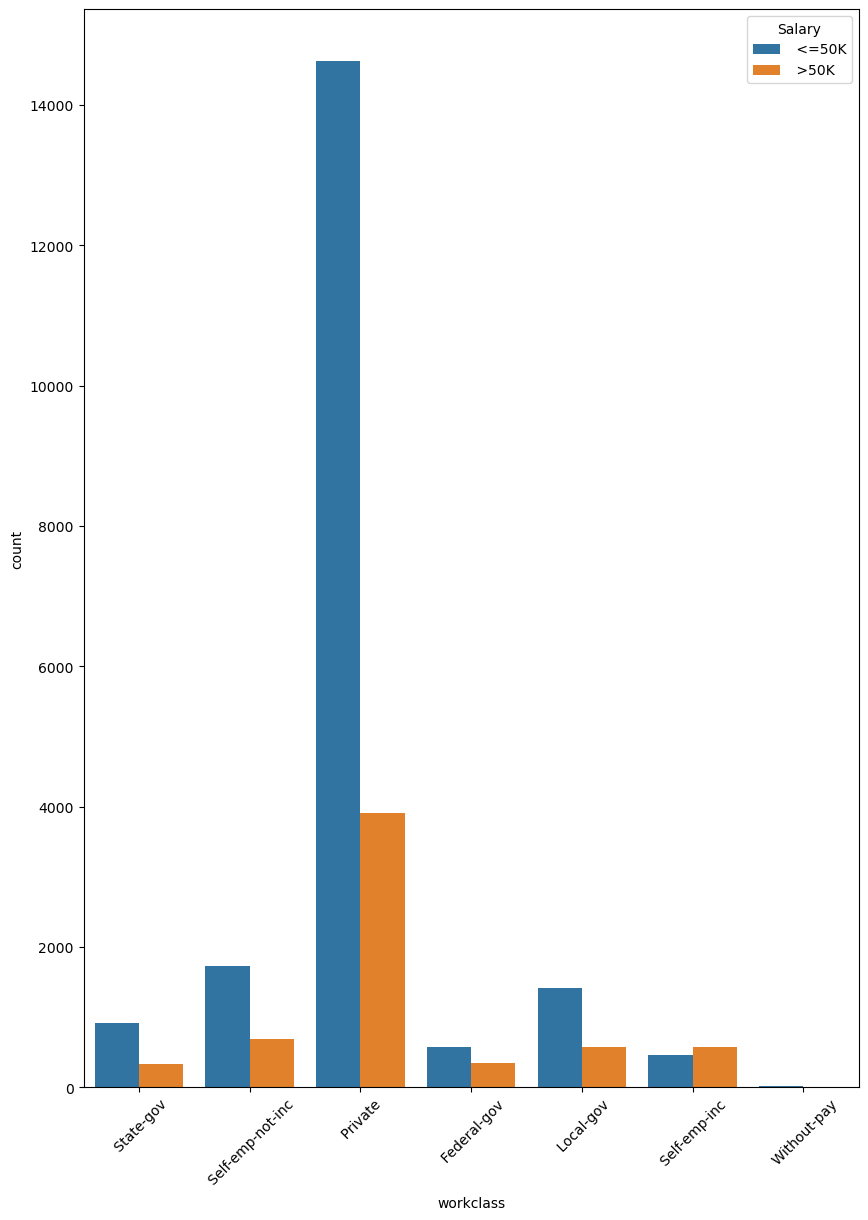

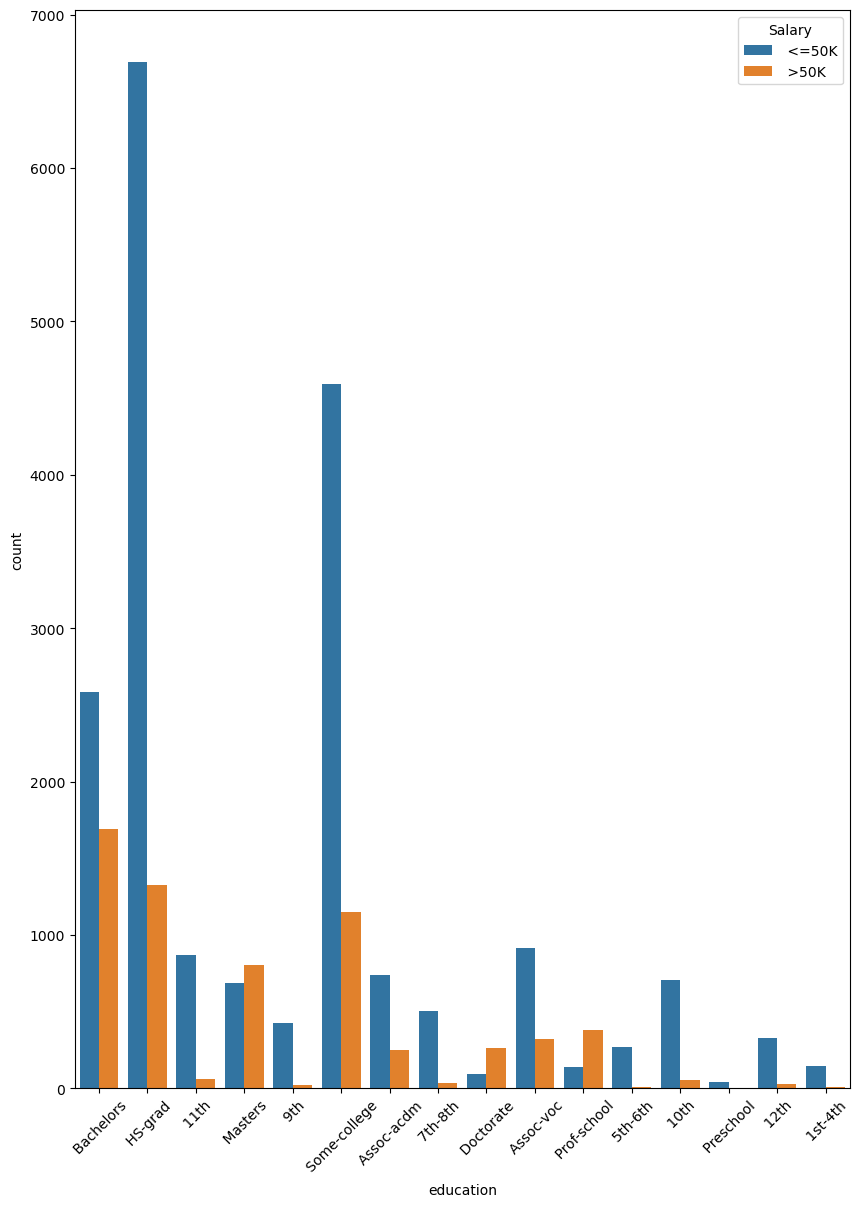

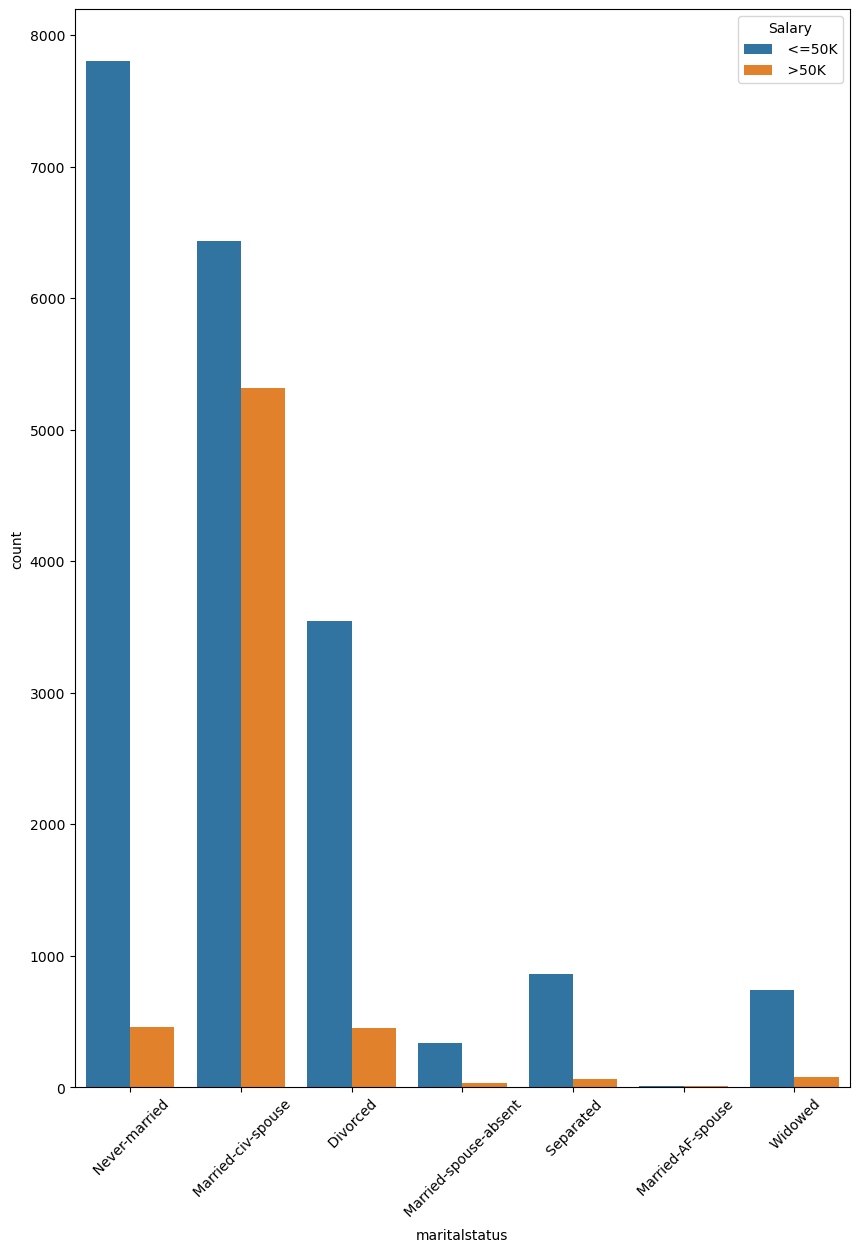

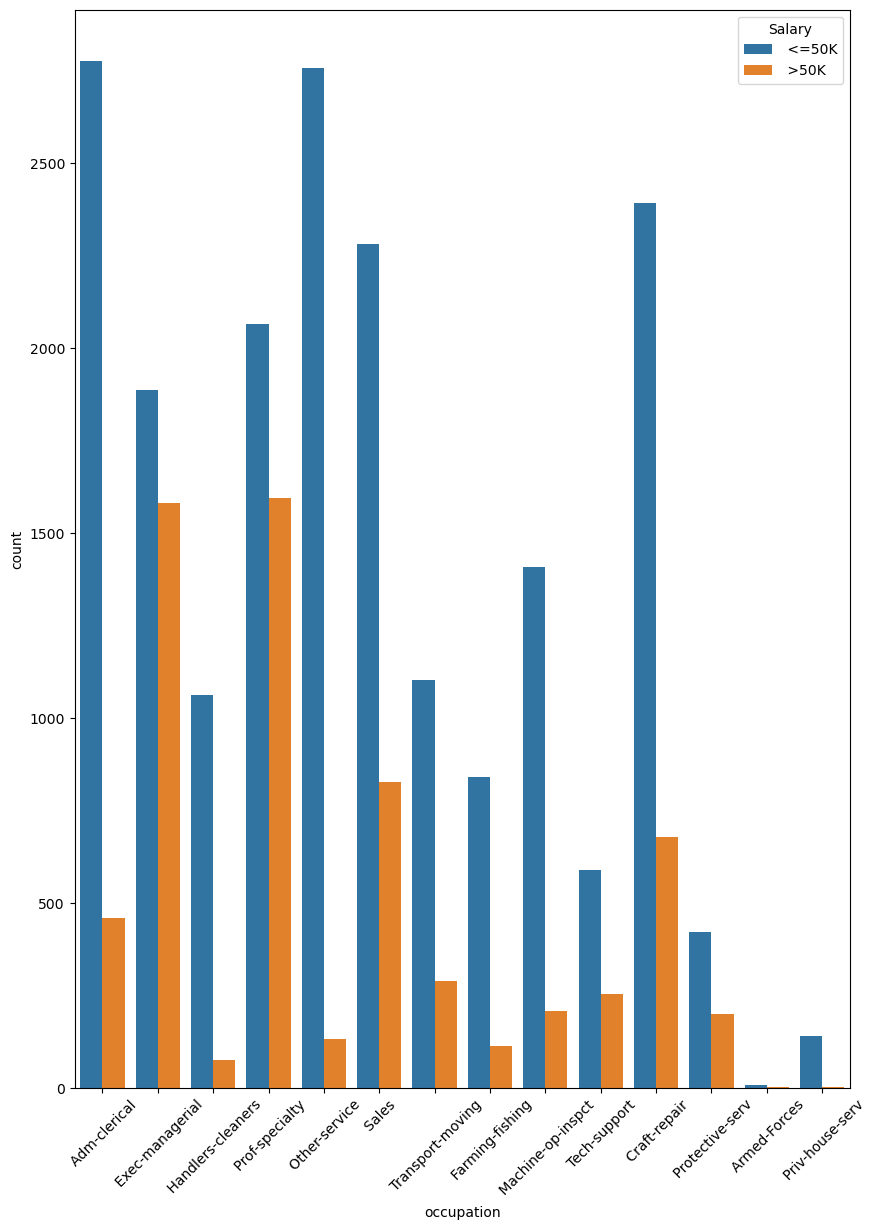

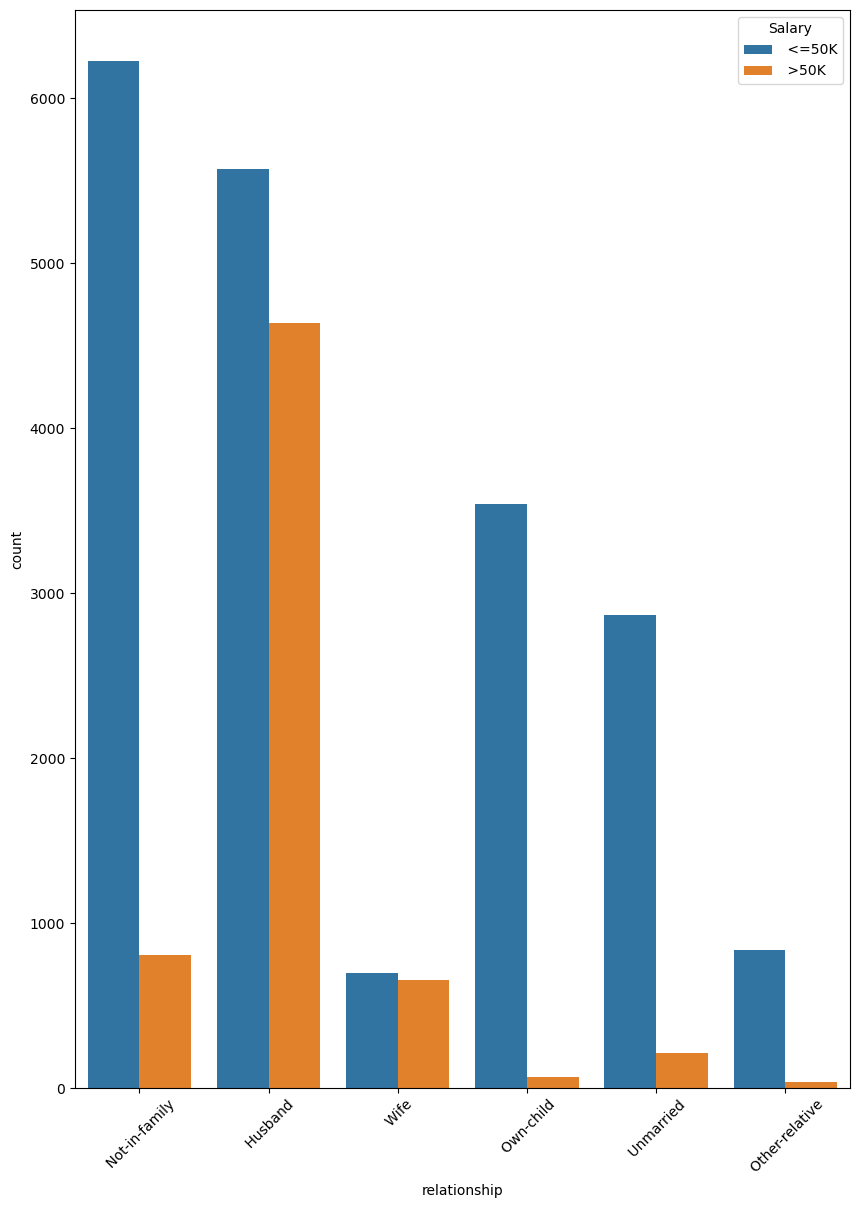

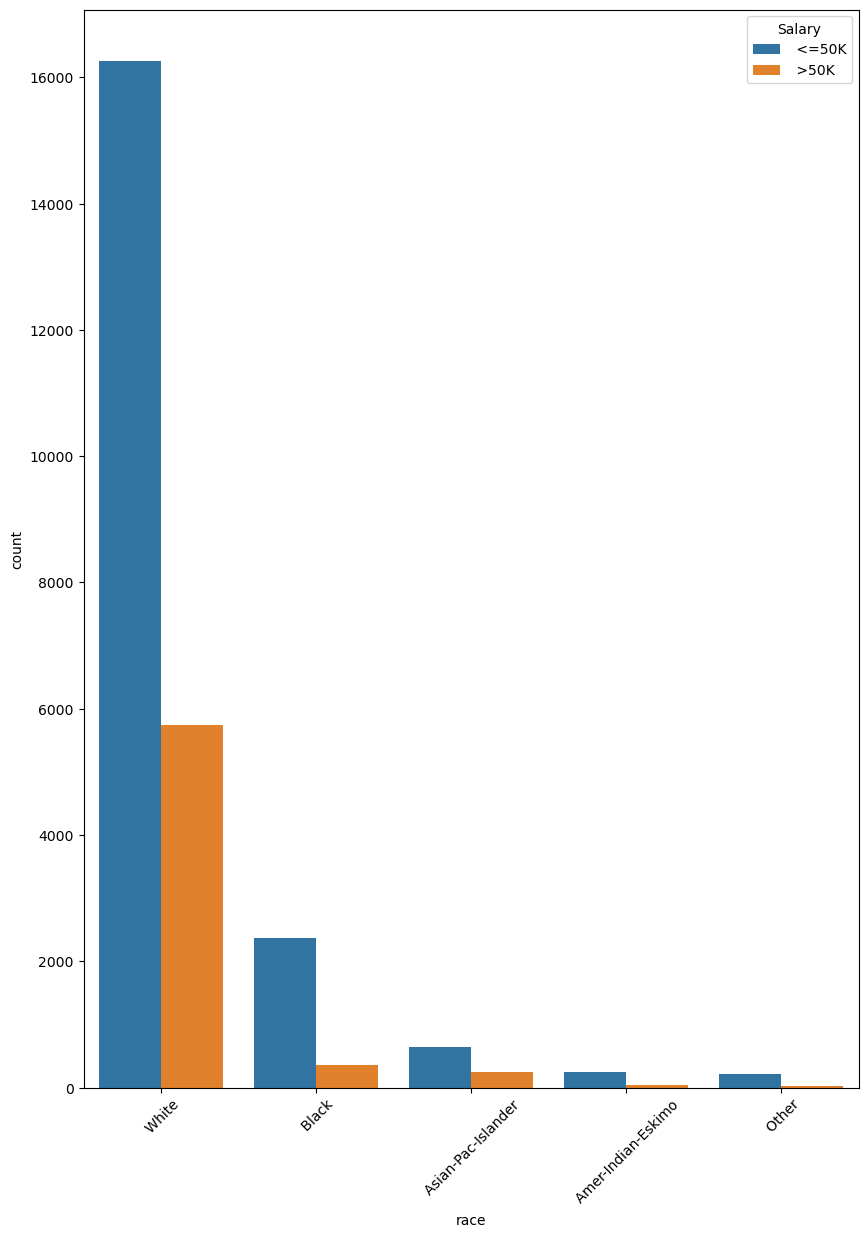

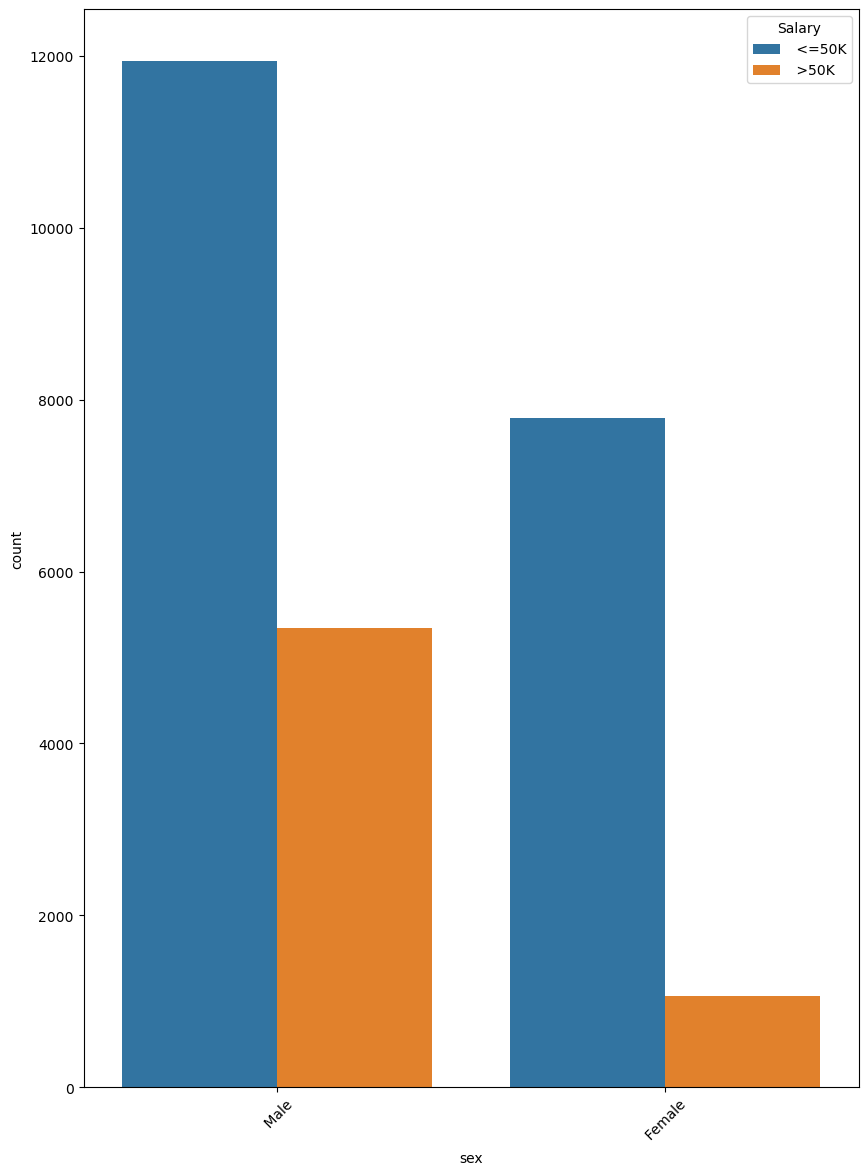

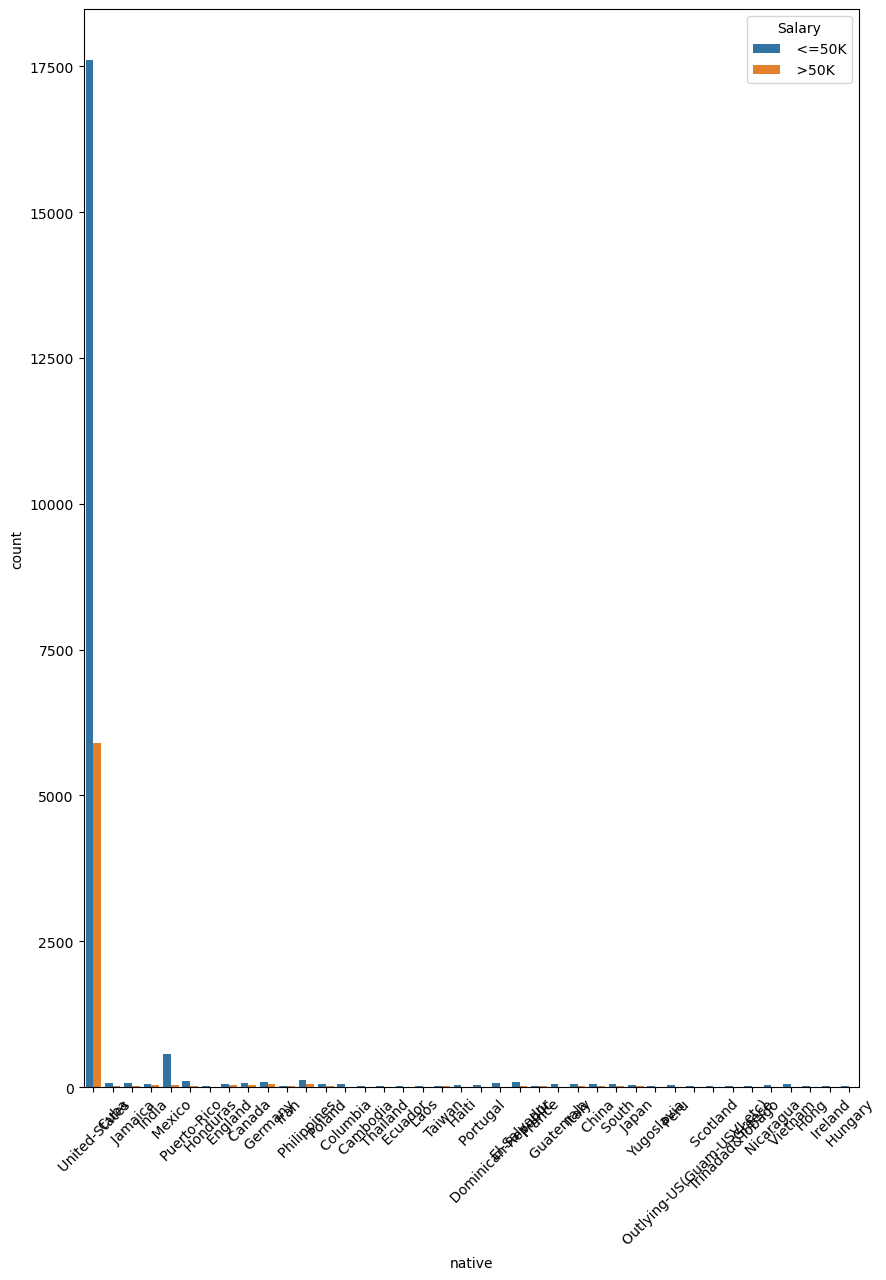

In [46]:
# Visualization of categorical data
cat_columns = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
for col in cat_columns:
    plt.figure(figsize=(10, 14))
    sns.countplot(data=train, x=col, hue='Salary')
    plt.xticks(rotation=45)
    plt.show()

In [47]:
# Selection of features
# Train dataset
train_feat = train.drop('Salary', axis=1)
train_tar = train['Salary']

# Test dataset
test_feat = test.drop('Salary', axis=1)
test_tar = test['Salary']

In [48]:
# Label encoding for categorical data 
train_feat = pd.get_dummies(train_feat)
test_feat = pd.get_dummies(test_feat)

In [49]:
train_feat.head()

,age,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,40,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
test_feat.head()

,age,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,50,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,40,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,30,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [51]:
# Label encoding for target columns
train_tar = encoder.fit_transform(train_tar)
train_tar

array([0, 0, 0, ..., 0, 0, 1])

In [52]:
test_tar = encoder.fit_transform(test_tar)
test_tar

array([0, 0, 1, ..., 0, 0, 1])

In [53]:
# Scaling of dataset
train_feat = scaler.fit_transform(train_feat)
test_feat = scaler.transform(test_feat)

#### Support Vector Classifier

In [54]:
# Fitting Support Vector Machine model and finding best kernel
sn = 1
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    print(f'{sn}. SVC model using kernel - {kernel}')
    classifier = SVC(kernel=kernel, random_state=10)
    classifier.fit(train_feat, train_tar)
    predicts = classifier.predict(test_feat)
    print('Confusion matrix: ')
    cm = confusion_matrix(test_tar, predicts)
    print(cm)
    print()
    print('Classification report: ')
    clr = classification_report(test_tar, predicts)
    print(clr)
    print()
    sn += 1

1. SVC model using kernel - linear
Confusion matrix: 
[[9704  825]
 [1548 1818]]

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     10529
           1       0.69      0.54      0.61      3366

    accuracy                           0.83     13895
   macro avg       0.78      0.73      0.75     13895
weighted avg       0.82      0.83      0.82     13895


2. SVC model using kernel - poly
Confusion matrix: 
[[9800  729]
 [1804 1562]]

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.93      0.89     10529
           1       0.68      0.46      0.55      3366

    accuracy                           0.82     13895
   macro avg       0.76      0.70      0.72     13895
weighted avg       0.81      0.82      0.80     13895


3. SVC model using kernel - rbf
Confusion matrix: 
[[9722  807]
 [1608 1758]]

Classification report: 
              precision    reca

Observation:

From above reports it can be oberved that SVC with kernel linear and rbf gives almost same results i.e. 83% accuracy.

In [55]:
# Best SVC model
model = SVC(kernel='rbf', random_state=10)
model.fit(train_feat, train_tar)
preds = model.predict(test_feat)

In [56]:
# Confusion matrix
confusion_matrix(test_tar, preds)

array([[9722,  807],
       [1608, 1758]], dtype=int64)

In [57]:
# Classification report
print(classification_report(test_tar, preds))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     10529
           1       0.69      0.52      0.59      3366

    accuracy                           0.83     13895
   macro avg       0.77      0.72      0.74     13895
weighted avg       0.82      0.83      0.82     13895

